# Importing require library for EDA, Data wrangling and data cleaning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Global%20Power%20Plant%20Database/database_IND.csv')

In [3]:
print('No of Rows:',df.shape[0])
print('No of Columns:',df.shape[1])
df.head()

No of Rows: 907
No of Columns: 27


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,2.41461,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        533 non-null    float64
 12  owner                     344 non-null    object 
 13  source                    907 non-null    object 
 14  url       

# Comment:

Dataset contain 907 Rows & 27 Columns.

Some feature are with object datatype and others are float

Other_Fuel3_generation_gwh,wepp_id, other_fuel2 are empty.

# Statistical Analysis

First we check integrity of data & Missing value

Data integrity Check

In [5]:
df.isin(['', 'NA','-','?']).sum().any()

False

No Whitespace exist in dataset

In [6]:
df.duplicated().sum()

0

No duplicate entry present in data

If we look csv file and look at datasset head, there are lots of data cleaning operation to be done.

Lots of missing data in certain columns

lot of non relevent data.

and many more

# Start With Looking At Missing Values

Columns we are going to remove are

Estimated_generation_gwh-Empty

Wepp_id- Empty

Other_Fuel2- Empty

Other_Fuel3- Empty
non relevalent
Owner- More than 60% data missing

year_of_capacity_data-missing data with single unique value

Country- non relevent info

country_long-non relevalent info

gppd_idnr-non relevalent info

URL-no missing value but of no use

In [7]:
df.drop(columns=["country","country_long",'url',"year_of_capacity_data","gppd_idnr","owner","other_fuel3","other_fuel2",
       "estimated_generation_gwh", "wepp_id"], axis=1, inplace=True )

In [8]:
missing_values= df.isnull().sum().sort_values(ascending = False)
percentage_missing_values = missing_values/len(df)*100
print(pd.concat([missing_values, percentage_missing_values], axis=1 , keys = ['Missing_Values', '% Missing Data' ]))

                        Missing_Values  % Missing Data
generation_gwh_2019                906       99.889746
other_fuel1                        709       78.169791
generation_gwh_2014                503       55.457552
generation_gwh_2015                479       52.811466
generation_gwh_2016                467       51.488423
generation_gwh_2017                461       50.826902
generation_gwh_2013                461       50.826902
generation_gwh_2018                454       50.055127
generation_data_source             453       49.944873
commissioning_year                 374       41.234840
latitude                            46        5.071665
longitude                           46        5.071665
geolocation_source                  19        2.094818
capacity_mw                          0        0.000000
source                               0        0.000000
primary_fuel                         0        0.000000
name                                 0        0.000000


# Strategy To Handle Missing Data

Geolocation source is catagorical data we can impute it with mode of category

Longitude or latitude can br impute by the mean or median of longitude and latitude

In generation_source_data 50% data is missing and doesn't have any importance in our analysis.

There are 5 different columns of GenerationGW-Hours for years 2013 to 2017.

Other_Fuel1 is another features of some importance with missing values.

Not every power palnt built to work with alternate fuel.

First talk about power plant foe which concept of other fuelis applicable

# Missing Values Imputation

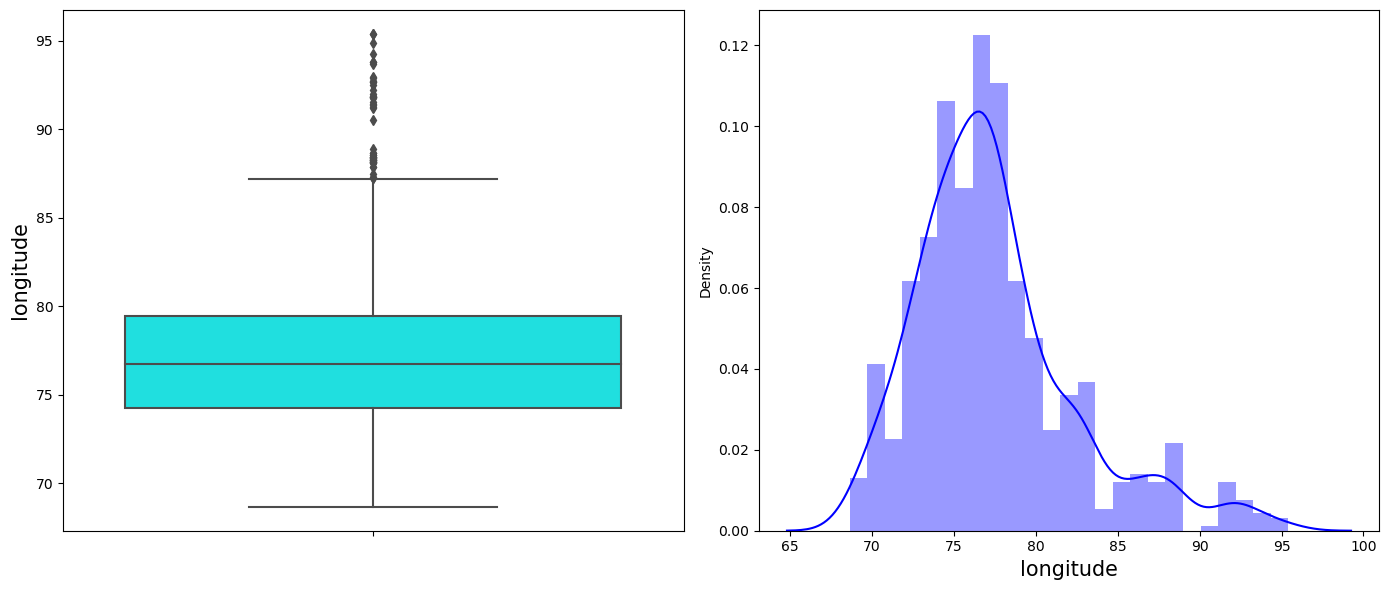

In [9]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot(y='longitude', data=df , color='cyan')
plt.ylabel('longitude', fontsize=15)
plt.subplot(1,2,2)
sns.distplot(df['longitude'], color='b')
plt.xlabel('longitude', fontsize=15)
plt.tight_layout()
plt.show()

We will imput longitude with median

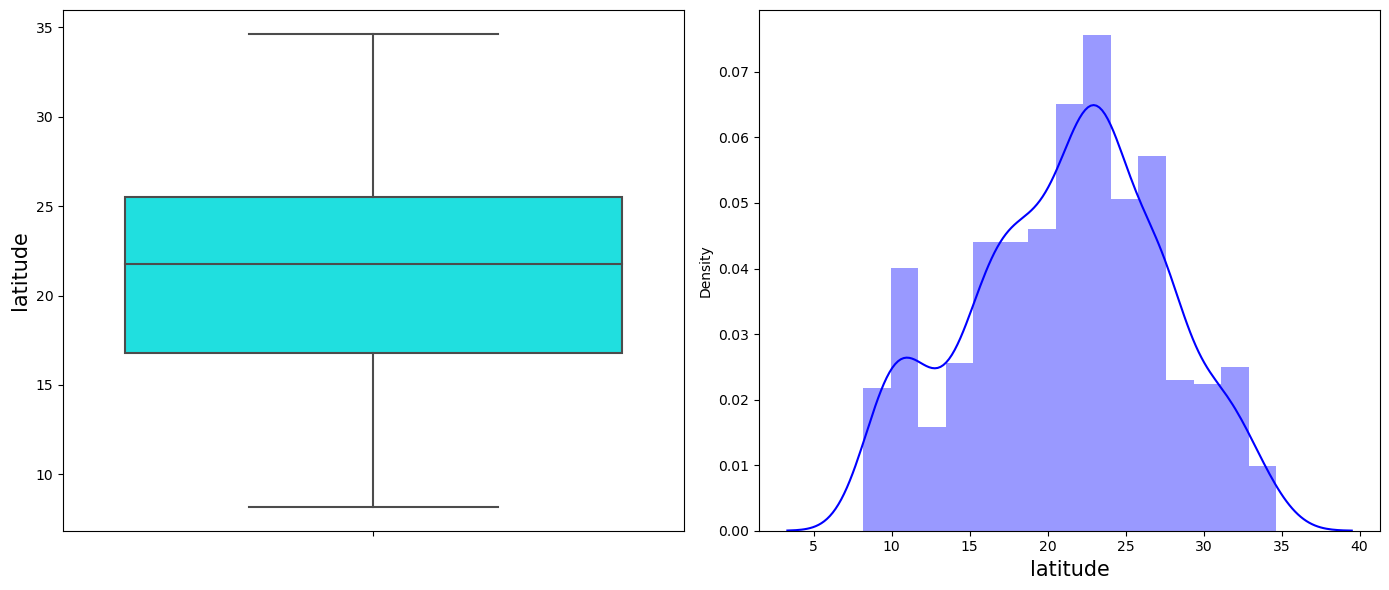

In [10]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot(y='latitude', data=df , color='cyan')
plt.ylabel('latitude', fontsize=15)
plt.subplot(1,2,2)
sns.distplot(df['latitude'], color='b')
plt.xlabel('latitude', fontsize=15)
plt.tight_layout()
plt.show()

# We will impute latitude with mean

In [11]:
df['geolocation_source'] = df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])
df['longitude']= df['longitude'].fillna(df['longitude'].median())
df['latitude'] = df['latitude'].fillna(df['latitude'].mean())

In [12]:
misssing_values = df.isnull().sum().sort_values(ascending= False)
percentage_missing_values=(missing_values/len(df))*100
print(pd.concat([missing_values,percentage_missing_values], axis=1, keys=['Missing_Values', '% Missing data']))

                        Missing_Values  % Missing data
generation_gwh_2019                906       99.889746
other_fuel1                        709       78.169791
generation_gwh_2014                503       55.457552
generation_gwh_2015                479       52.811466
generation_gwh_2016                467       51.488423
generation_gwh_2017                461       50.826902
generation_gwh_2013                461       50.826902
generation_gwh_2018                454       50.055127
generation_data_source             453       49.944873
commissioning_year                 374       41.234840
latitude                            46        5.071665
longitude                           46        5.071665
geolocation_source                  19        2.094818
capacity_mw                          0        0.000000
source                               0        0.000000
primary_fuel                         0        0.000000
name                                 0        0.000000


# Statstical Matrix

In [13]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,907.000000,907.000000,533.000000,446.000000,404.000000,428.000000,440.000000,446.000000,453.000000
mean,326.223755,21.197918,77.427103,1997.078799,436.579872,2410.620062,2406.769148,2449.949567,2531.301939,2595.299215
std,590.085456,6.079148,4.815073,17.119477,1624.717598,4002.130125,4170.303340,4139.826108,4174.261177,4294.595169
min,0.000000,8.168900,68.644700,1927.000000,-947.600000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,17.072000,74.388900,1988.000000,0.688250,219.417762,180.793688,186.152062,178.397305,196.054800
50%,59.200000,21.281800,76.719500,2001.000000,14.264000,794.587100,697.450781,737.205450,817.977250,798.381000
75%,385.250000,25.176450,79.206100,2012.000000,138.133250,3014.967937,3020.045750,3269.942437,3263.677500,3139.308000
max,4760.000000,34.649000,95.408000,2018.000000,14779.303000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


Observation

Bigest powerplant has power generation capacity of 4760 MW.

In each generation GW-Hours columns means is greater than median.

Powerplant are located in latitude range of 8.168900 to 95.408000 while longitude range of 4.815073 to 95.408000

Oldest power plant comission date to 1927 an most recent power plant is build  in 2018.

Median of capacity MW is 59.20 MW. This show that lot of small capacity powerplant is present in dataset.

# Regression Target Features - Capacity


Lets find details about smallest and bigest powerplant

In [14]:
print('Minimum Capacity Of Powerplant:', df.capacity_mw.min())
print('Maximum Capacity Of Powerplant:', df.capacity_mw.max())

Minimum Capacity Of Powerplant: 0.0
Maximum Capacity Of Powerplant: 4760.0


In [15]:
df.loc[df.capacity_mw==4760]

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source
880,VINDH_CHAL STPS,4760.0,24.0983,82.6719,Coal,Oil,2002.0,Central Electricity Authority,WRI,11.354,27594.0,29047.0,30015.0,35116.0,35136.0,NaN,Central Electricity Authority


In [16]:
df.loc[df.capacity_mw==0]

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source
829,Tata BP - Electronics City Solar Panel Plant,0.0,12.8491,77.6752,Solar,NaN,NaN,Tata BP Solar India Limited,Industry About,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Comments:

Biggest powerplant in India as per dataset is VINDH_CHAL STPS with power generation capacity of 4760 MW.

Smallest power planty is mention as Tata BP-Electronic city solar power plant with capacoty of 0 MW. 

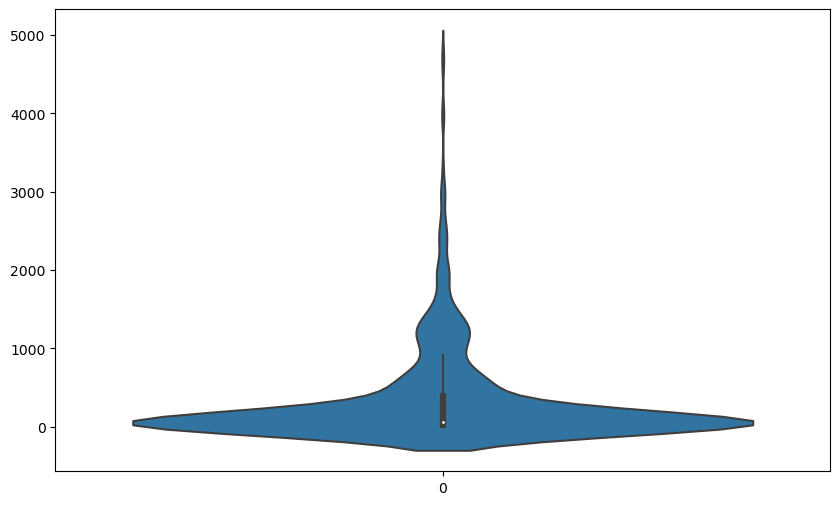

In [17]:
plt.figure(figsize=(10,6))
sns.violinplot(df.capacity_mw)
plt.show()

In [18]:
df.loc[df.capacity_mw>1500].shape

(39, 17)

There are only 17 powerplant of capacity more than 1500 MW.

In [19]:
pd.crosstab(df['capacity_mw'], df["primary_fuel"], margins=True).T.style.background_gradient(cmap='summer_r')

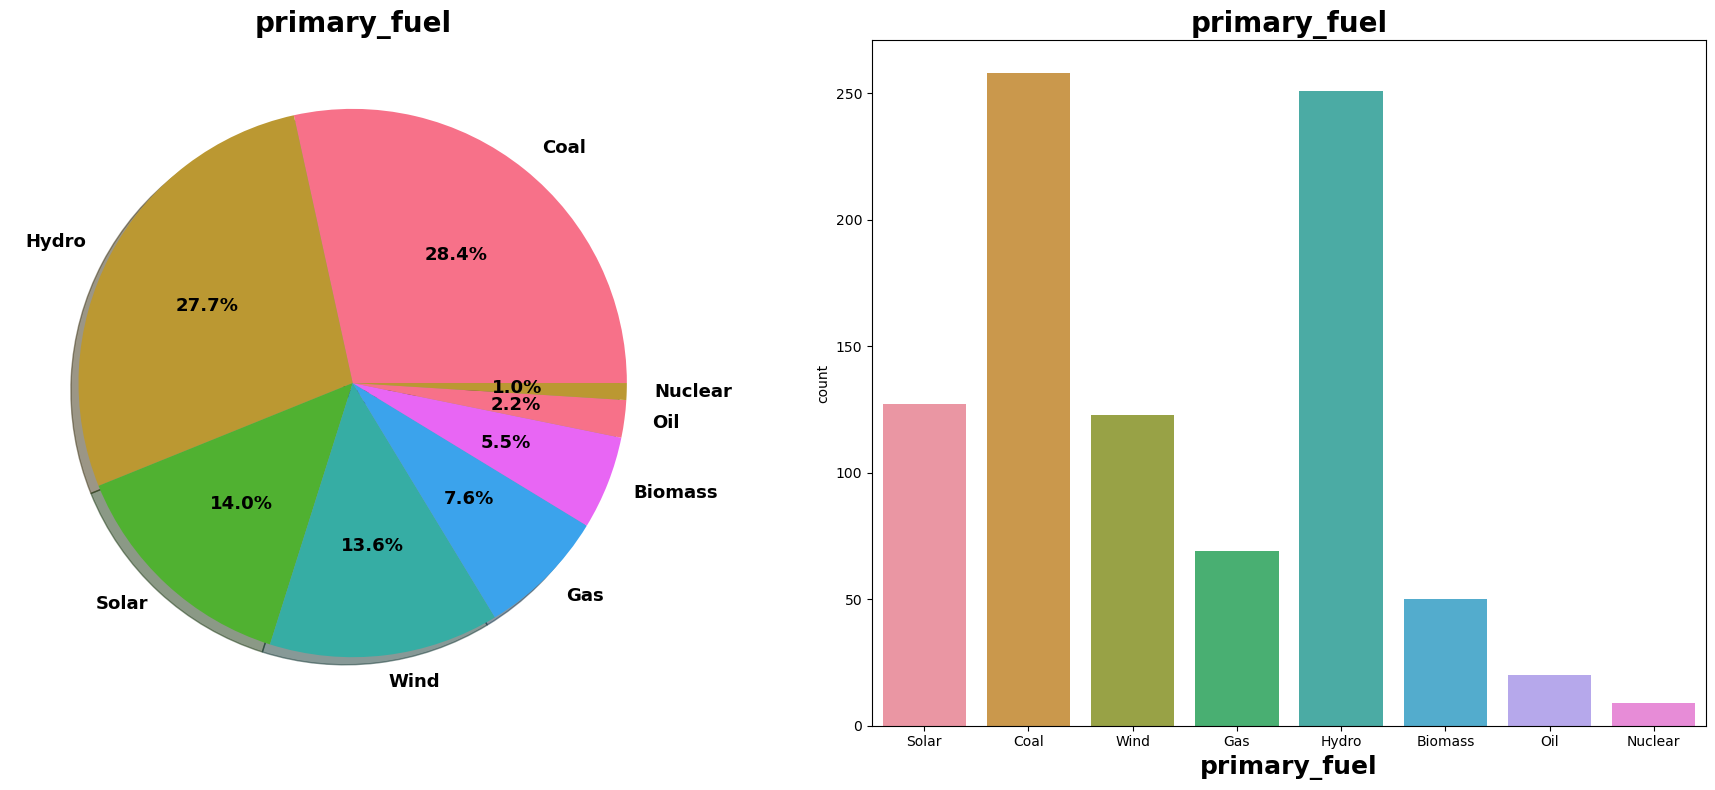

In [20]:
plt.rcParams["figure.autolayout"]= True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(18,8))
df['primary_fuel'].value_counts().plot.pie(autopct='%2.1f%%',
                                           textprops={'fontweight':'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('primary_fuel', fontsize=20, fontweight= 'bold')
ax[0].set_ylabel('')
sns.countplot(x='primary_fuel',data=df, ax=ax[1])
ax[1].set_title("primary_fuel", fontsize=20, fontweight= 'bold')
ax[1].set_xlabel("primary_fuel", fontsize=18, fontweight= 'bold')
plt.show()

In [21]:
df.primary_fuel.value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

Comments

Maximum number of powerplant are coal base power plant.

Arround 40% power plant are unconventional power plant based ion non-conventional energy sources.

There are only 9 Nuclear power plant.

# Lets find generation capacity of all Power plant

In [22]:
print('Total Power Generation Capacity of all Power Plants:', df['capacity_mw'].sum(),'Mw')

Total Power Generation Capacity of all Power Plants: 295884.946 Mw


India's total power generation capacity is 295884.946 Mw.

Now lets check sector wise capacity

In [23]:
df['capacity_mw'].groupby(df["primary_fuel"]).agg([sum])

,sum
primary_fuel,
Biomass,1003.260
Coal,205839.220
Gas,25172.506
Hydro,46441.770
Nuclear,8780.000
Oil,1778.840
Solar,2757.500
Wind,4111.850


Comments:

Out of total power generation maximum generates from coal.

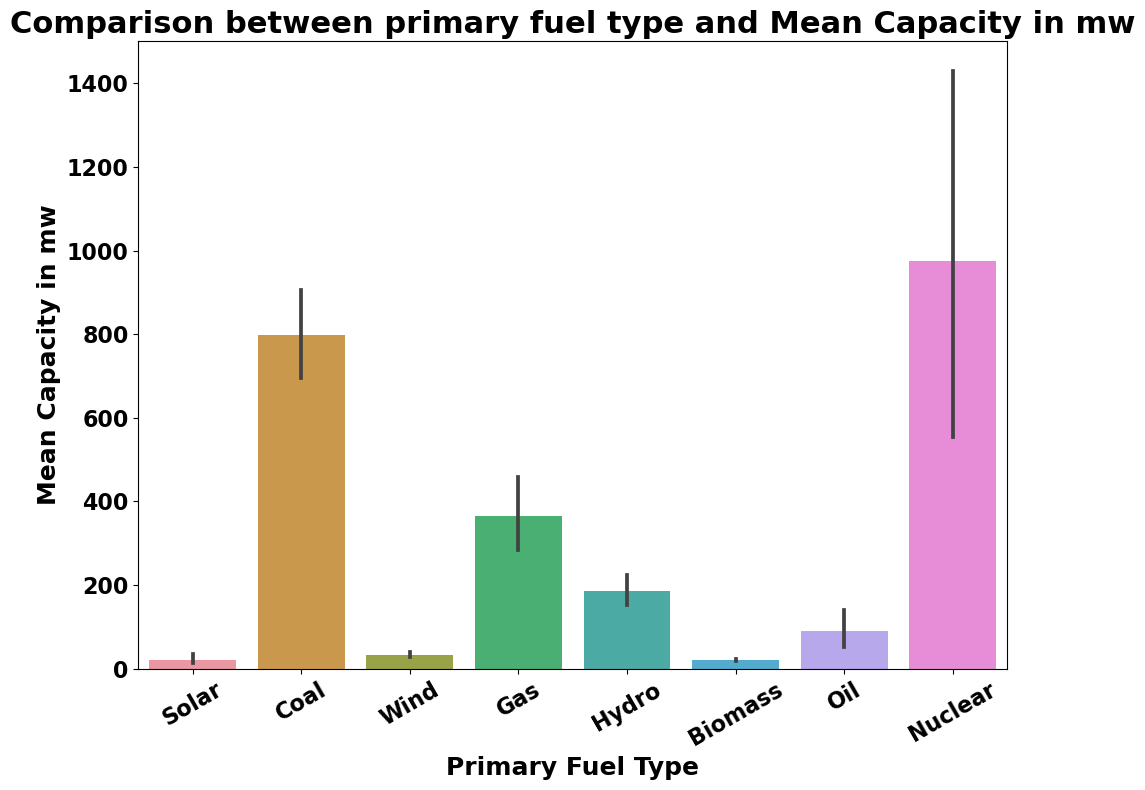

In [24]:
plt.figure(figsize=(10,8))
y = df["capacity_mw"]
p = sns.barplot(x="primary_fuel", y="capacity_mw", data=df)
plt.title('Comparison between primary fuel type and Mean Capacity in mw', fontsize=22, fontweight='bold')
p.set_xlabel('Primary Fuel Type', fontsize=18, fontweight='bold')
p.set_ylabel('Mean Capacity in mw', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16, fontweight='bold', rotation=30)
plt.yticks(fontsize=16, fontweight='bold')
plt.show()

Above result is obvious as only 9 nuclear power plant it mean capacity is higher.

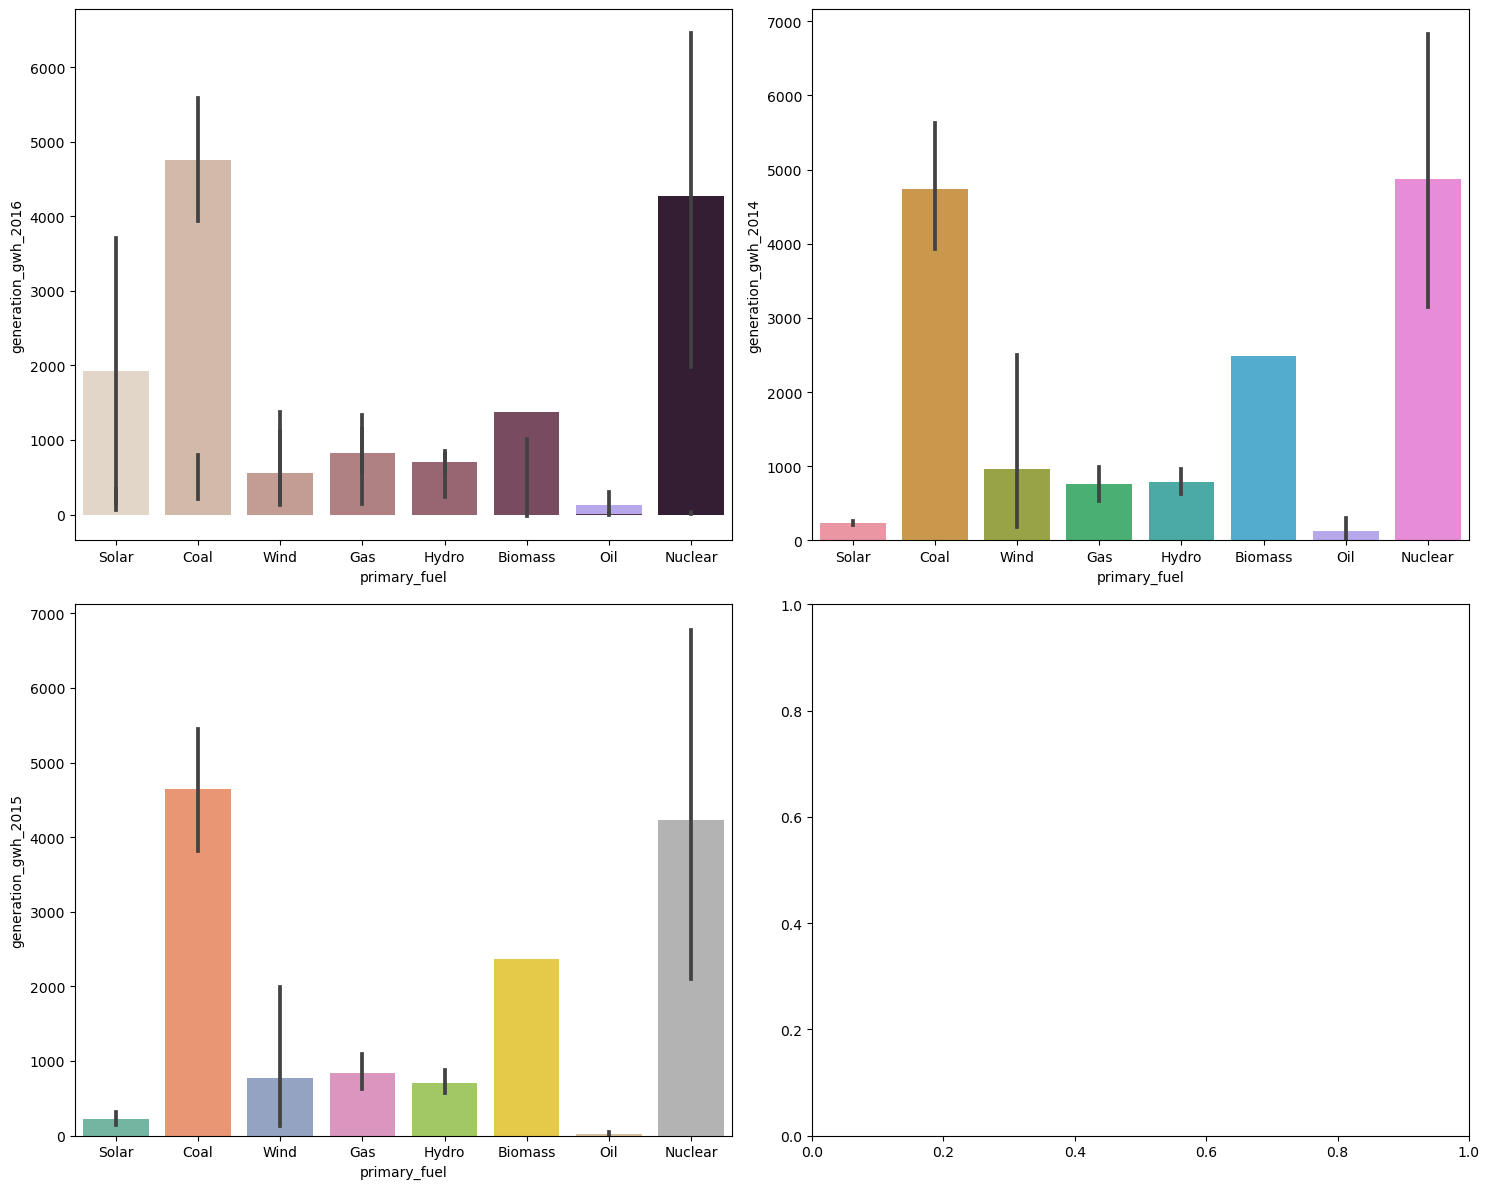

In [25]:
fig,axes=plt.subplots(2,2, figsize=(15,12))
sns.barplot(x="primary_fuel",y="generation_gwh_2013", ax=axes[0,0],data=df)
sns.barplot(x="primary_fuel",y="generation_gwh_2014", ax=axes[0,1],data=df)
sns.barplot(x="primary_fuel",y="generation_gwh_2015", ax=axes[1,0],data=df,palette='Set2')
sns.barplot(x="primary_fuel",y="generation_gwh_2016", ax=axes[0,0],data=df, palette="ch:.25")
plt.show()

`From the graph we can see nuclear has high mean electrical generation report for all the years followed by coal.Reason is high efficiency of nyclear power plant.


Other fuel type is less contribution in power generation.

# Location Vs Primary Fuel

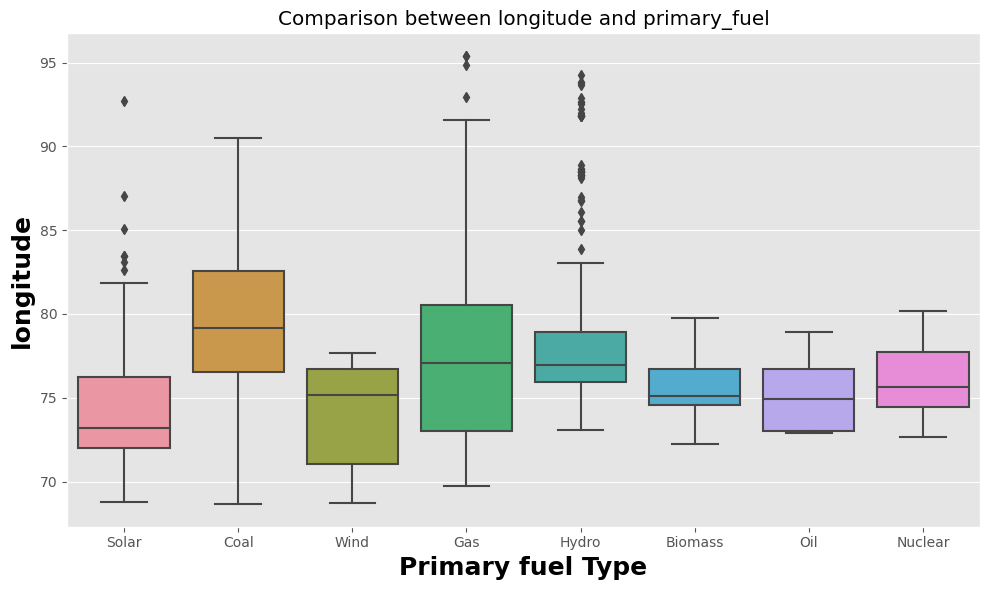

In [26]:
plt.figure(figsize=(10,6))
plt.style.use('ggplot')
plt.title('Comparison between longitude and primary_fuel')
a = sns.boxplot(x=df['primary_fuel'],y=df["longitude"])
a.set_xlabel('Primary fuel Type', fontsize=18,fontweight='bold')
a.set_ylabel('longitude',fontsize=18,fontweight='bold')
plt.show()

Location is important features for Nuclear powerplant. This plant lies between 15 to 25 latitude and longitude range of 75 to 88 degree.

# Location Vs Capacity

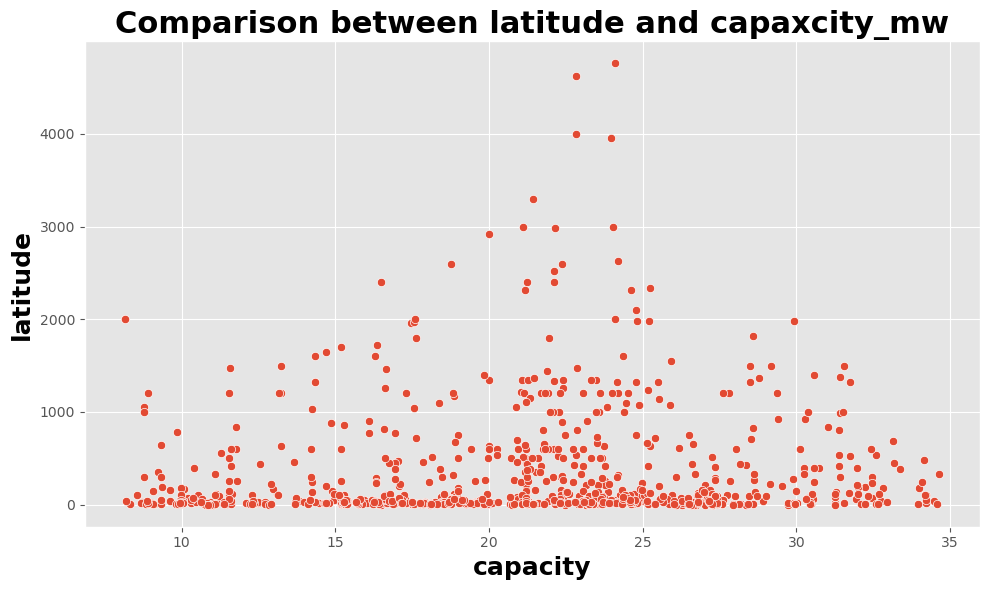

In [27]:
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparison between latitude and capaxcity_mw', fontsize=22, fontweight='bold')
a=sns.scatterplot(x=df['latitude'],y=df['capacity_mw'])
a.set_xlabel('capacity', fontsize=18, fontweight='bold')
a.set_ylabel('latitude', fontsize=18, fontweight='bold')
plt.show()

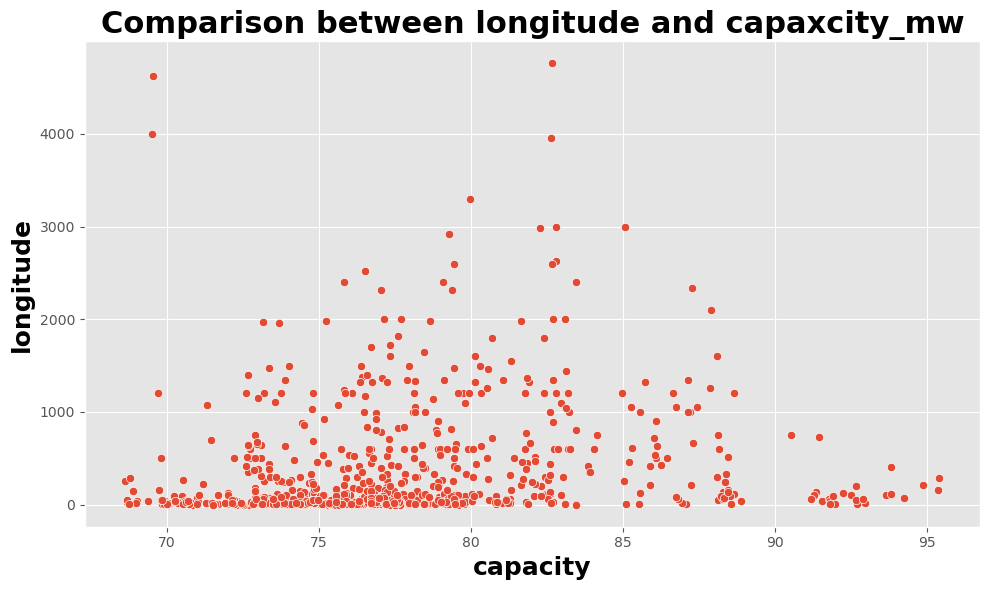

In [28]:
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparison between longitude and capaxcity_mw', fontsize=22, fontweight='bold')
a=sns.scatterplot(x=df['longitude'],y=df['capacity_mw'])
a.set_xlabel('capacity', fontsize=18, fontweight='bold')
a.set_ylabel('longitude', fontsize=18, fontweight='bold')
plt.show()

# Comparison Age Vs Primary Fuel

In [29]:
df['Power_plant_age']=2018-df['commissioning_year']
df.drop(columns=['commissioning_year'],inplace=True)

In [30]:
print('The oldest Powerplant Age:',df.Power_plant_age.max())
print('The youngest Powerplant Age:',df.Power_plant_age.min())

The oldest Powerplant Age: 91.0
The youngest Powerplant Age: 0.0


In [31]:
df.loc[df.Power_plant_age==91]

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,Power_plant_age
728,SIVASAMUNDRUM,42.0,12.3082,77.165,Hydro,NaN,Central Electricity Authority,WRI,NaN,220.82035,215.3777,144.4143,175.92595,282.76905,NaN,Central Electricity Authority,91.0


The oldest power plant is SIVASAMUNDRUM which is hydro power based plant capacity is of 42Mw.

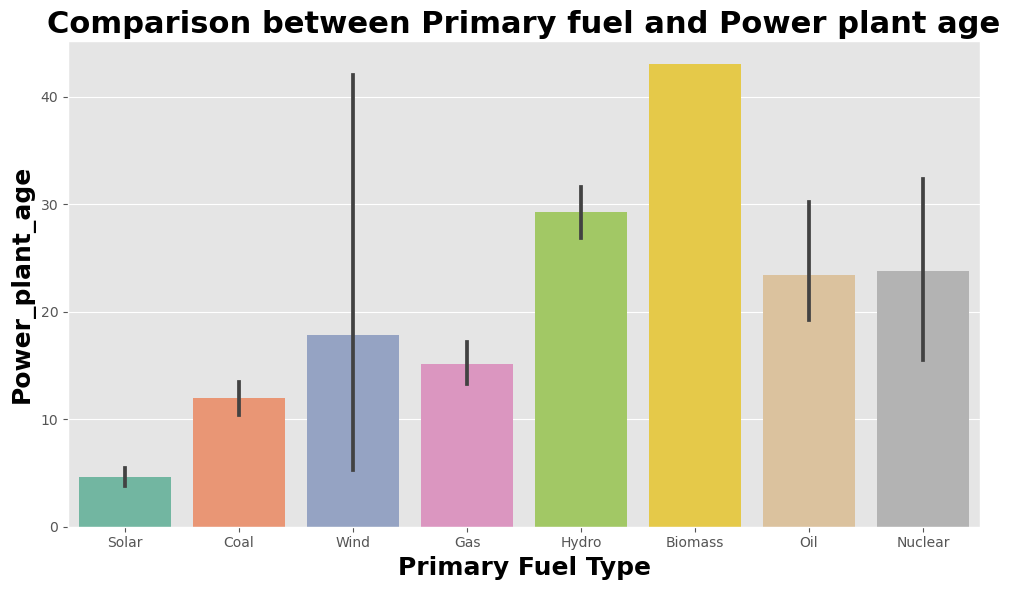

In [32]:
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparison between Primary fuel and Power plant age', fontsize=22, fontweight='bold')
a=sns.barplot(x=df['primary_fuel'],y=df['Power_plant_age'], data=df , palette="Set2")
a.set_xlabel('Primary Fuel Type', fontsize=18, fontweight='bold')
a.set_ylabel('Power_plant_age', fontsize=18, fontweight='bold')
plt.show()

<Axes: title={'center': 'Comparison between Power_plant Age and Capacity_mw'}, xlabel='Power_plant_age', ylabel='capacity_mw'>

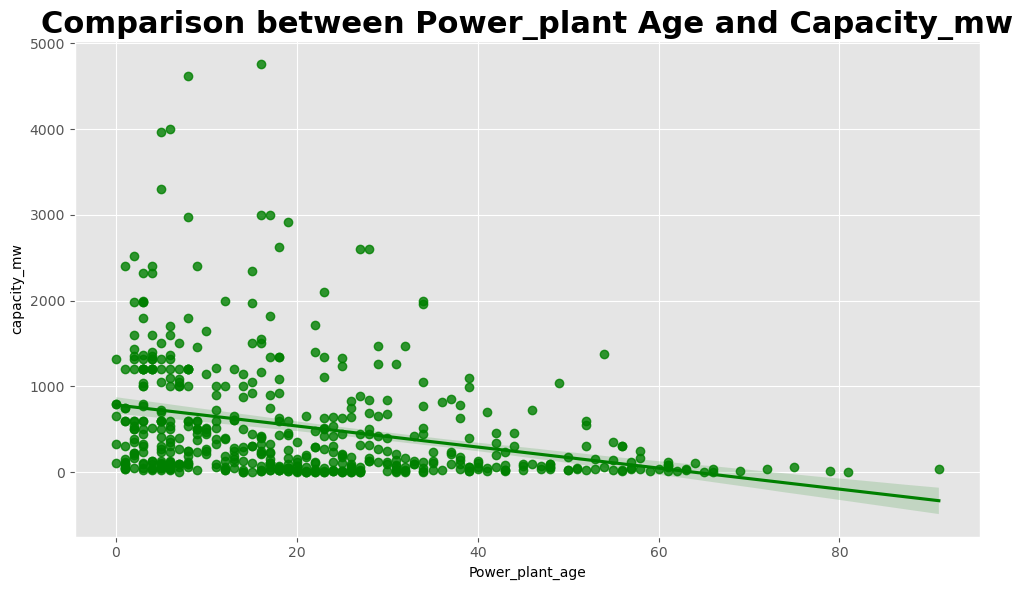

In [33]:
plt.figure(figsize=[10,6])
plt.title('Comparison between Power_plant Age and Capacity_mw', fontsize=22, fontweight='bold')
sns.regplot(x=df['Power_plant_age'],y=df['capacity_mw'], color= "g")

The -ve linear relationship between features and labels.

We can say that capacity of older plant is very less than compared to the powerplants which are stated recently.

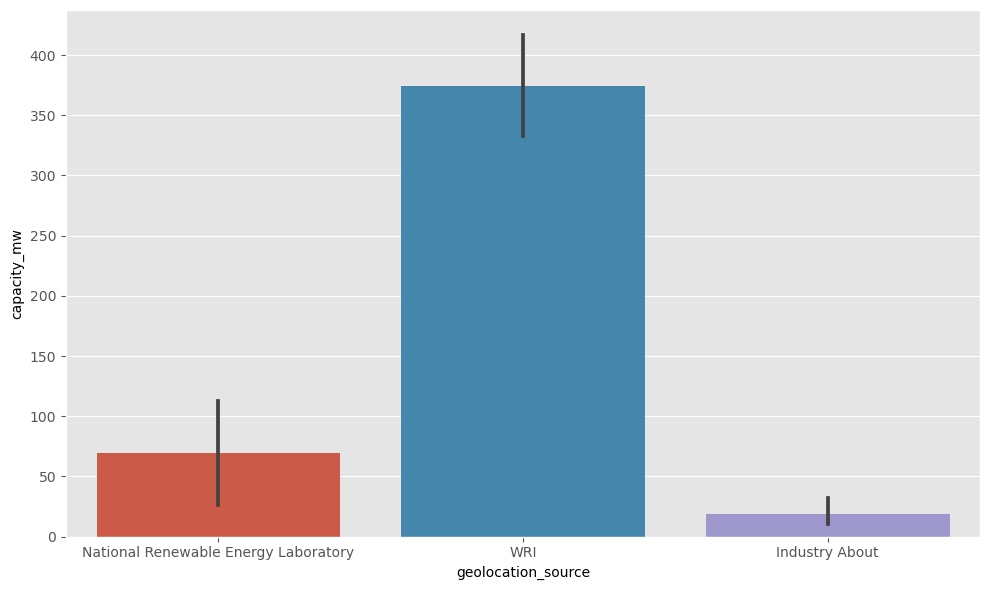

In [34]:
plt.figure(figsize=[10,6])
sns.barplot(x="geolocation_source", y="capacity_mw", data=df)
plt.show()

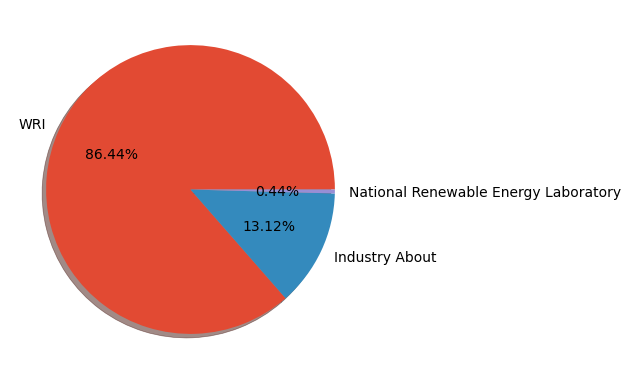

In [35]:
labels='WRI','Industry About','National Renewable Energy Laboratory'
fig, ax = plt.subplots(figsize=(6,5))
ax.pie(df['geolocation_source'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

The capacity of geological source WRI is maximum which has capacity more than 350 MW.

# Distribution Of Features

In [36]:
Numerical=['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
           'generation_gwh_2016', 'generation_gwh_2017', 'Power_plant_age']

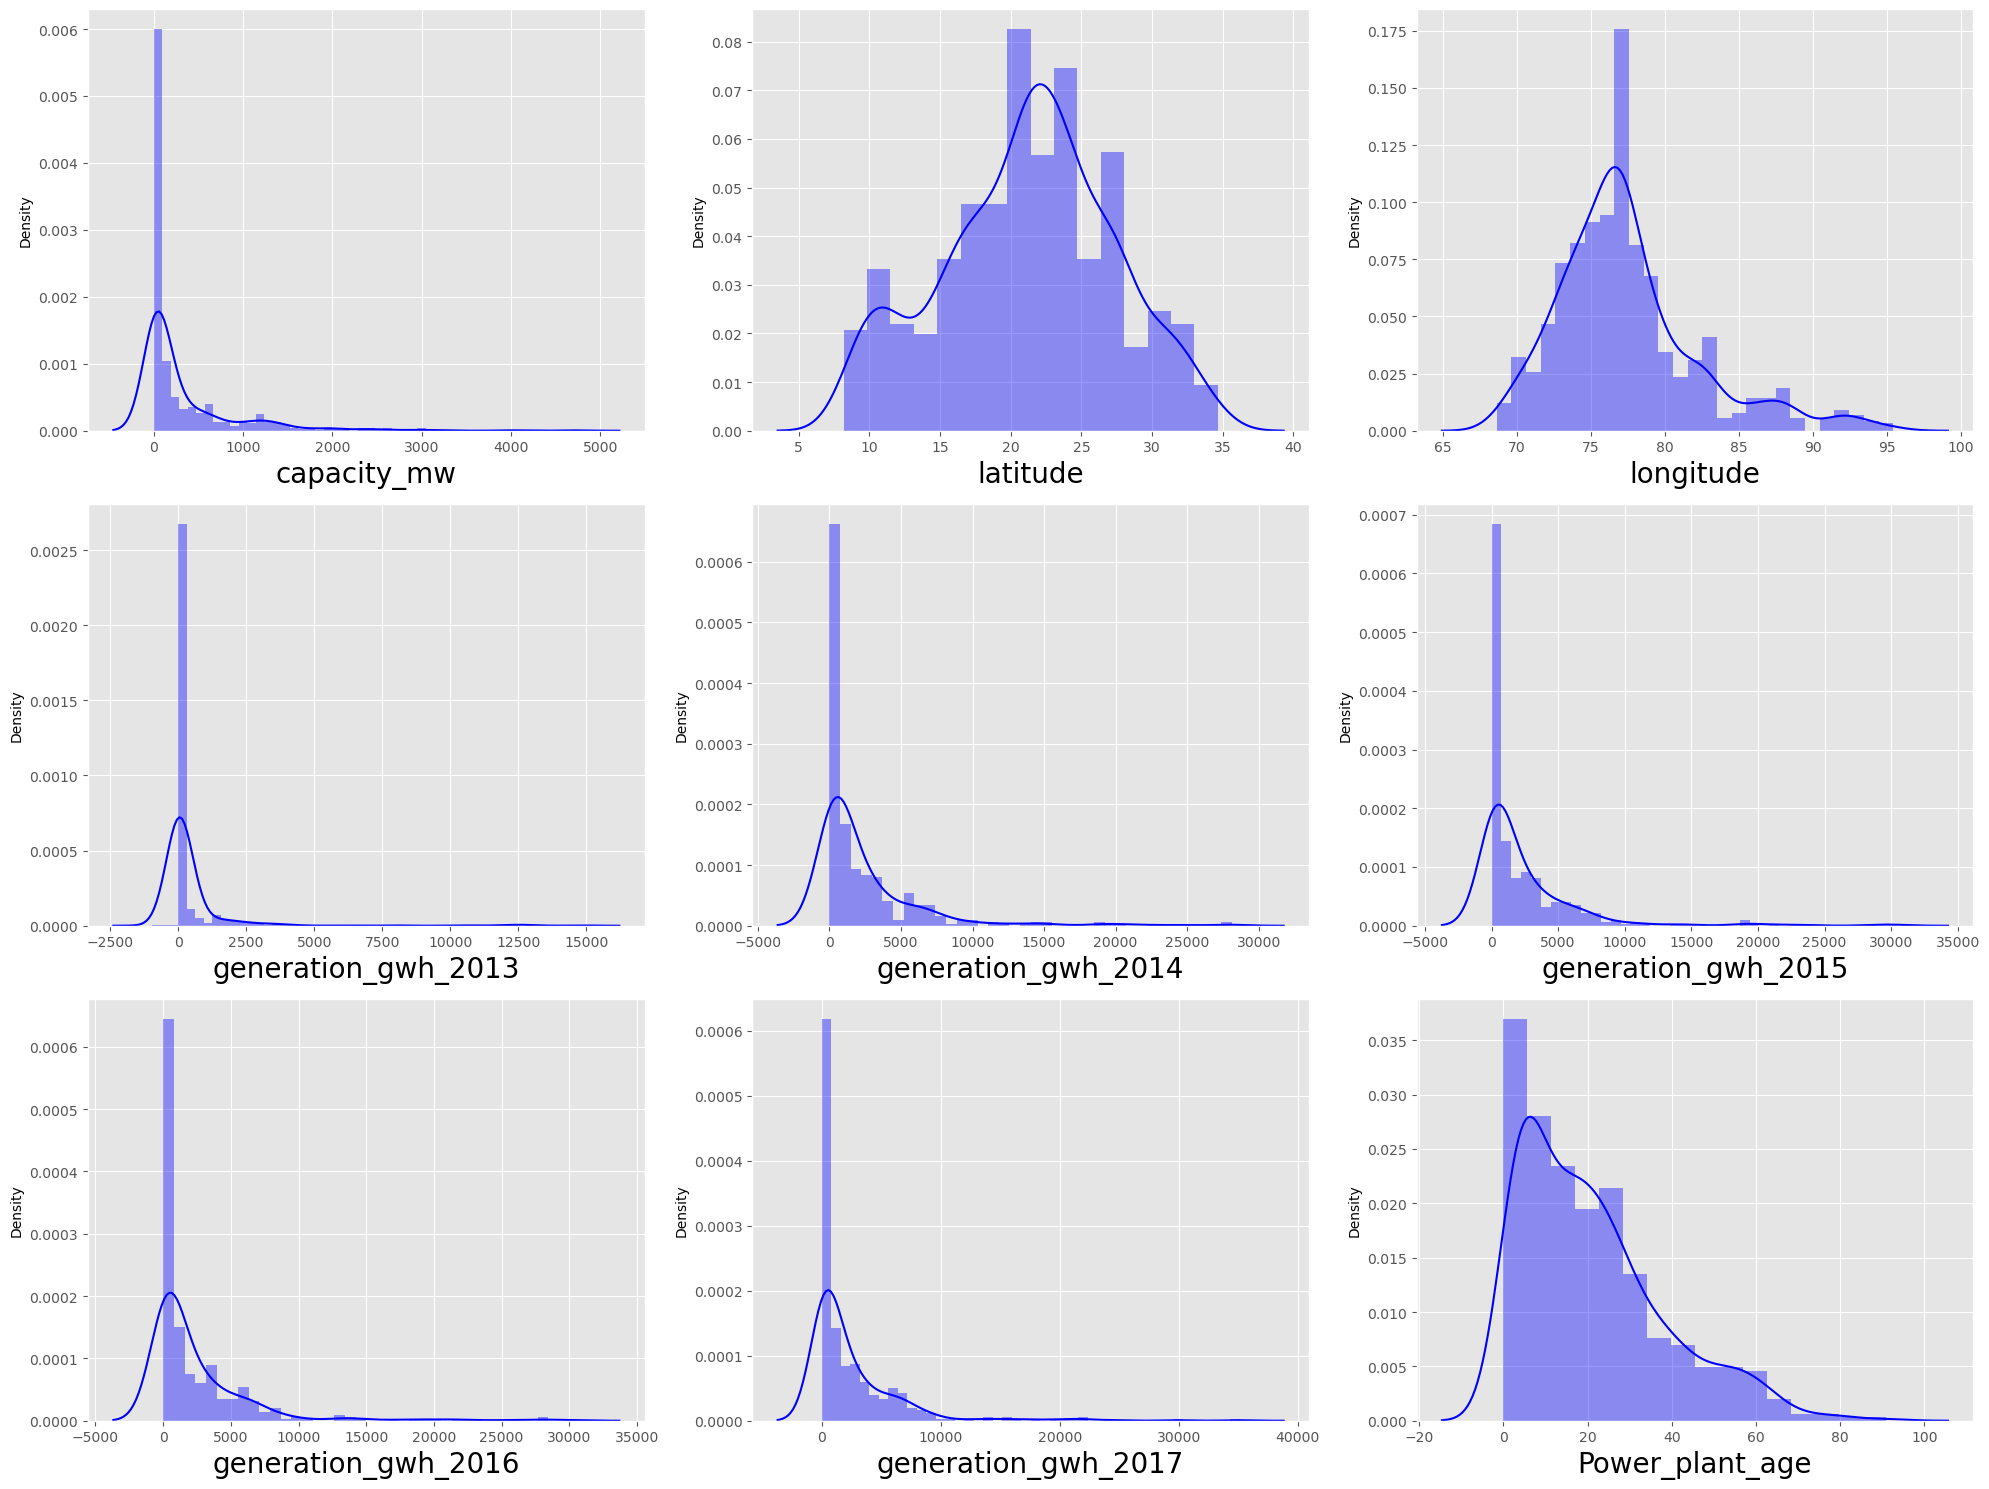

In [37]:
plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for col in Numerical:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[col],color='b')
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.tight_layout()

From above distributionplot we can observe that the data is not normally distributed in all the columns except latitude and longitude.

In most of the column mean is geater than the median means they are skewed to right.

We will remove all the skewedness in all these columns except the label later.

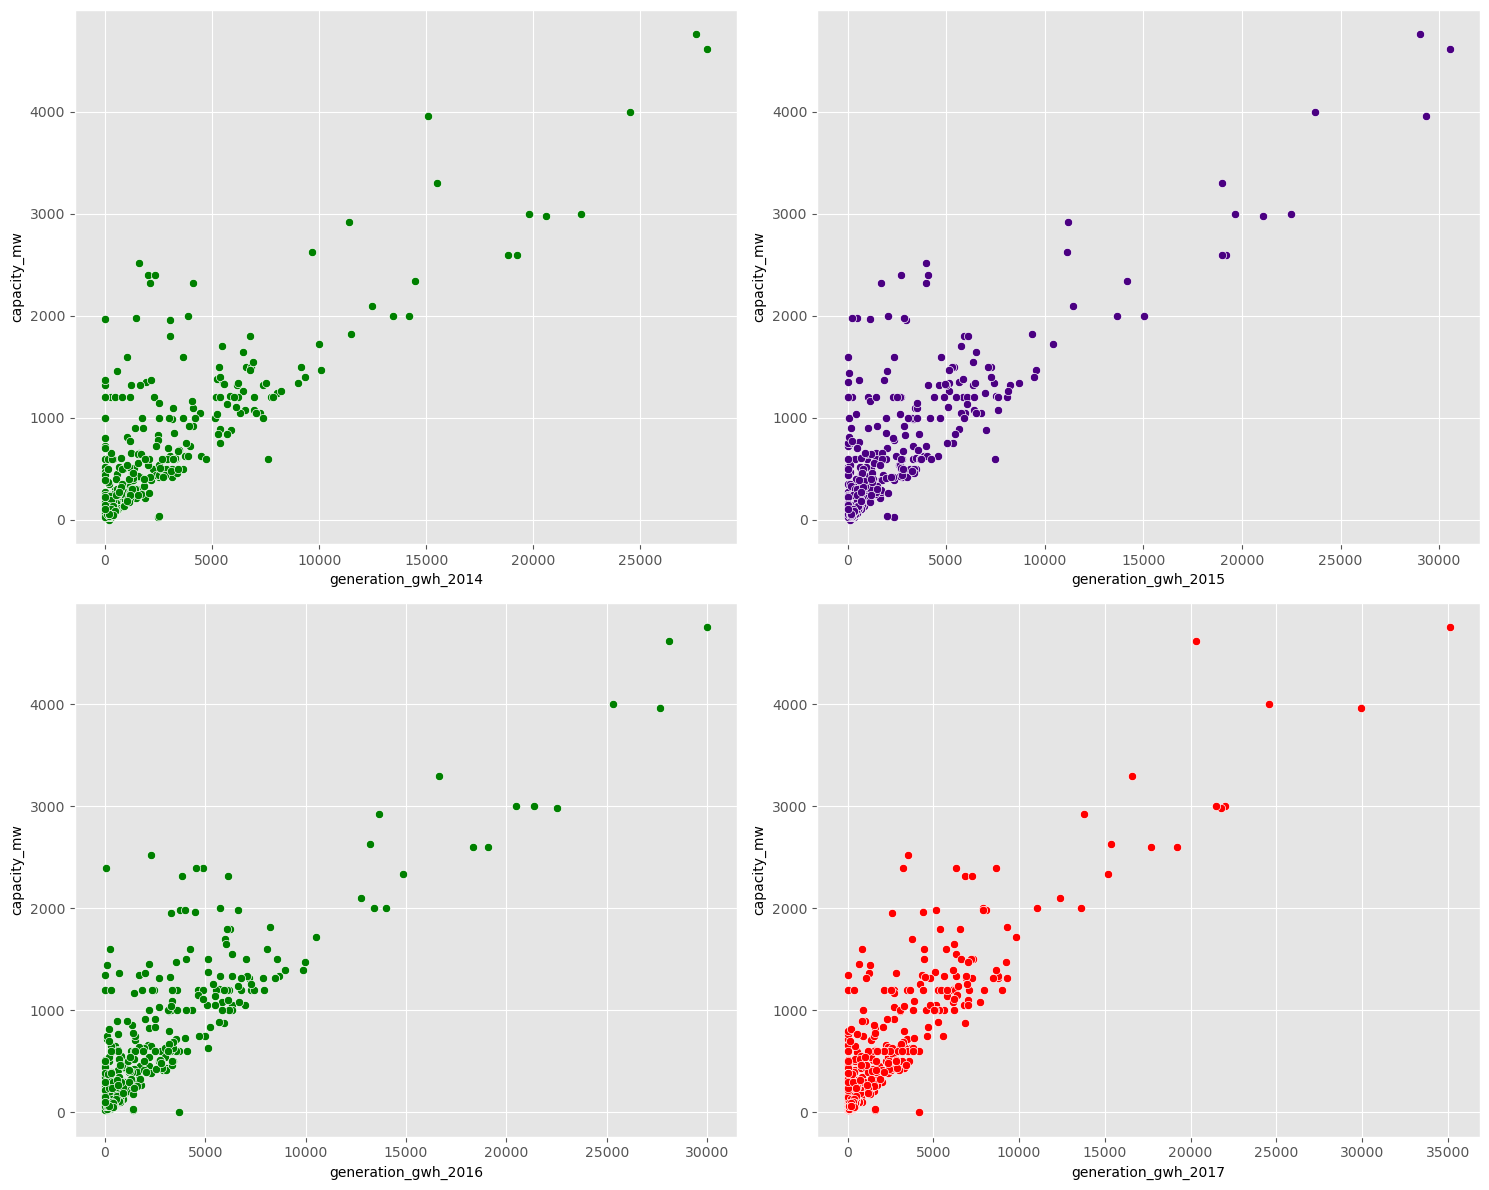

In [38]:
fig,axes=plt.subplots(2,2,figsize=(15,12))

sns.scatterplot(x='generation_gwh_2014',y='capacity_mw',ax=axes[0,0],data=df,color="g")
sns.scatterplot(x='generation_gwh_2015',y='capacity_mw',ax=axes[0,1],data=df,color="indigo")
sns.scatterplot(x='generation_gwh_2016',y='capacity_mw',ax=axes[1,0],data=df,color="g")
sns.scatterplot(x='generation_gwh_2017',y='capacity_mw',ax=axes[1,1],data=df,color="r")
plt.show()

There is +Ve linear relationship between capacity and electricity generation reported for the year mentioned.

The plot show the elctricity generation capacity reported for the years 2014,2015,2016,2017 have high capacity of abovw 100Mw, also gthe power generation growth is more than 5000 in all the years.

As the electricity generation growth increases, the capacity of plants also increases.

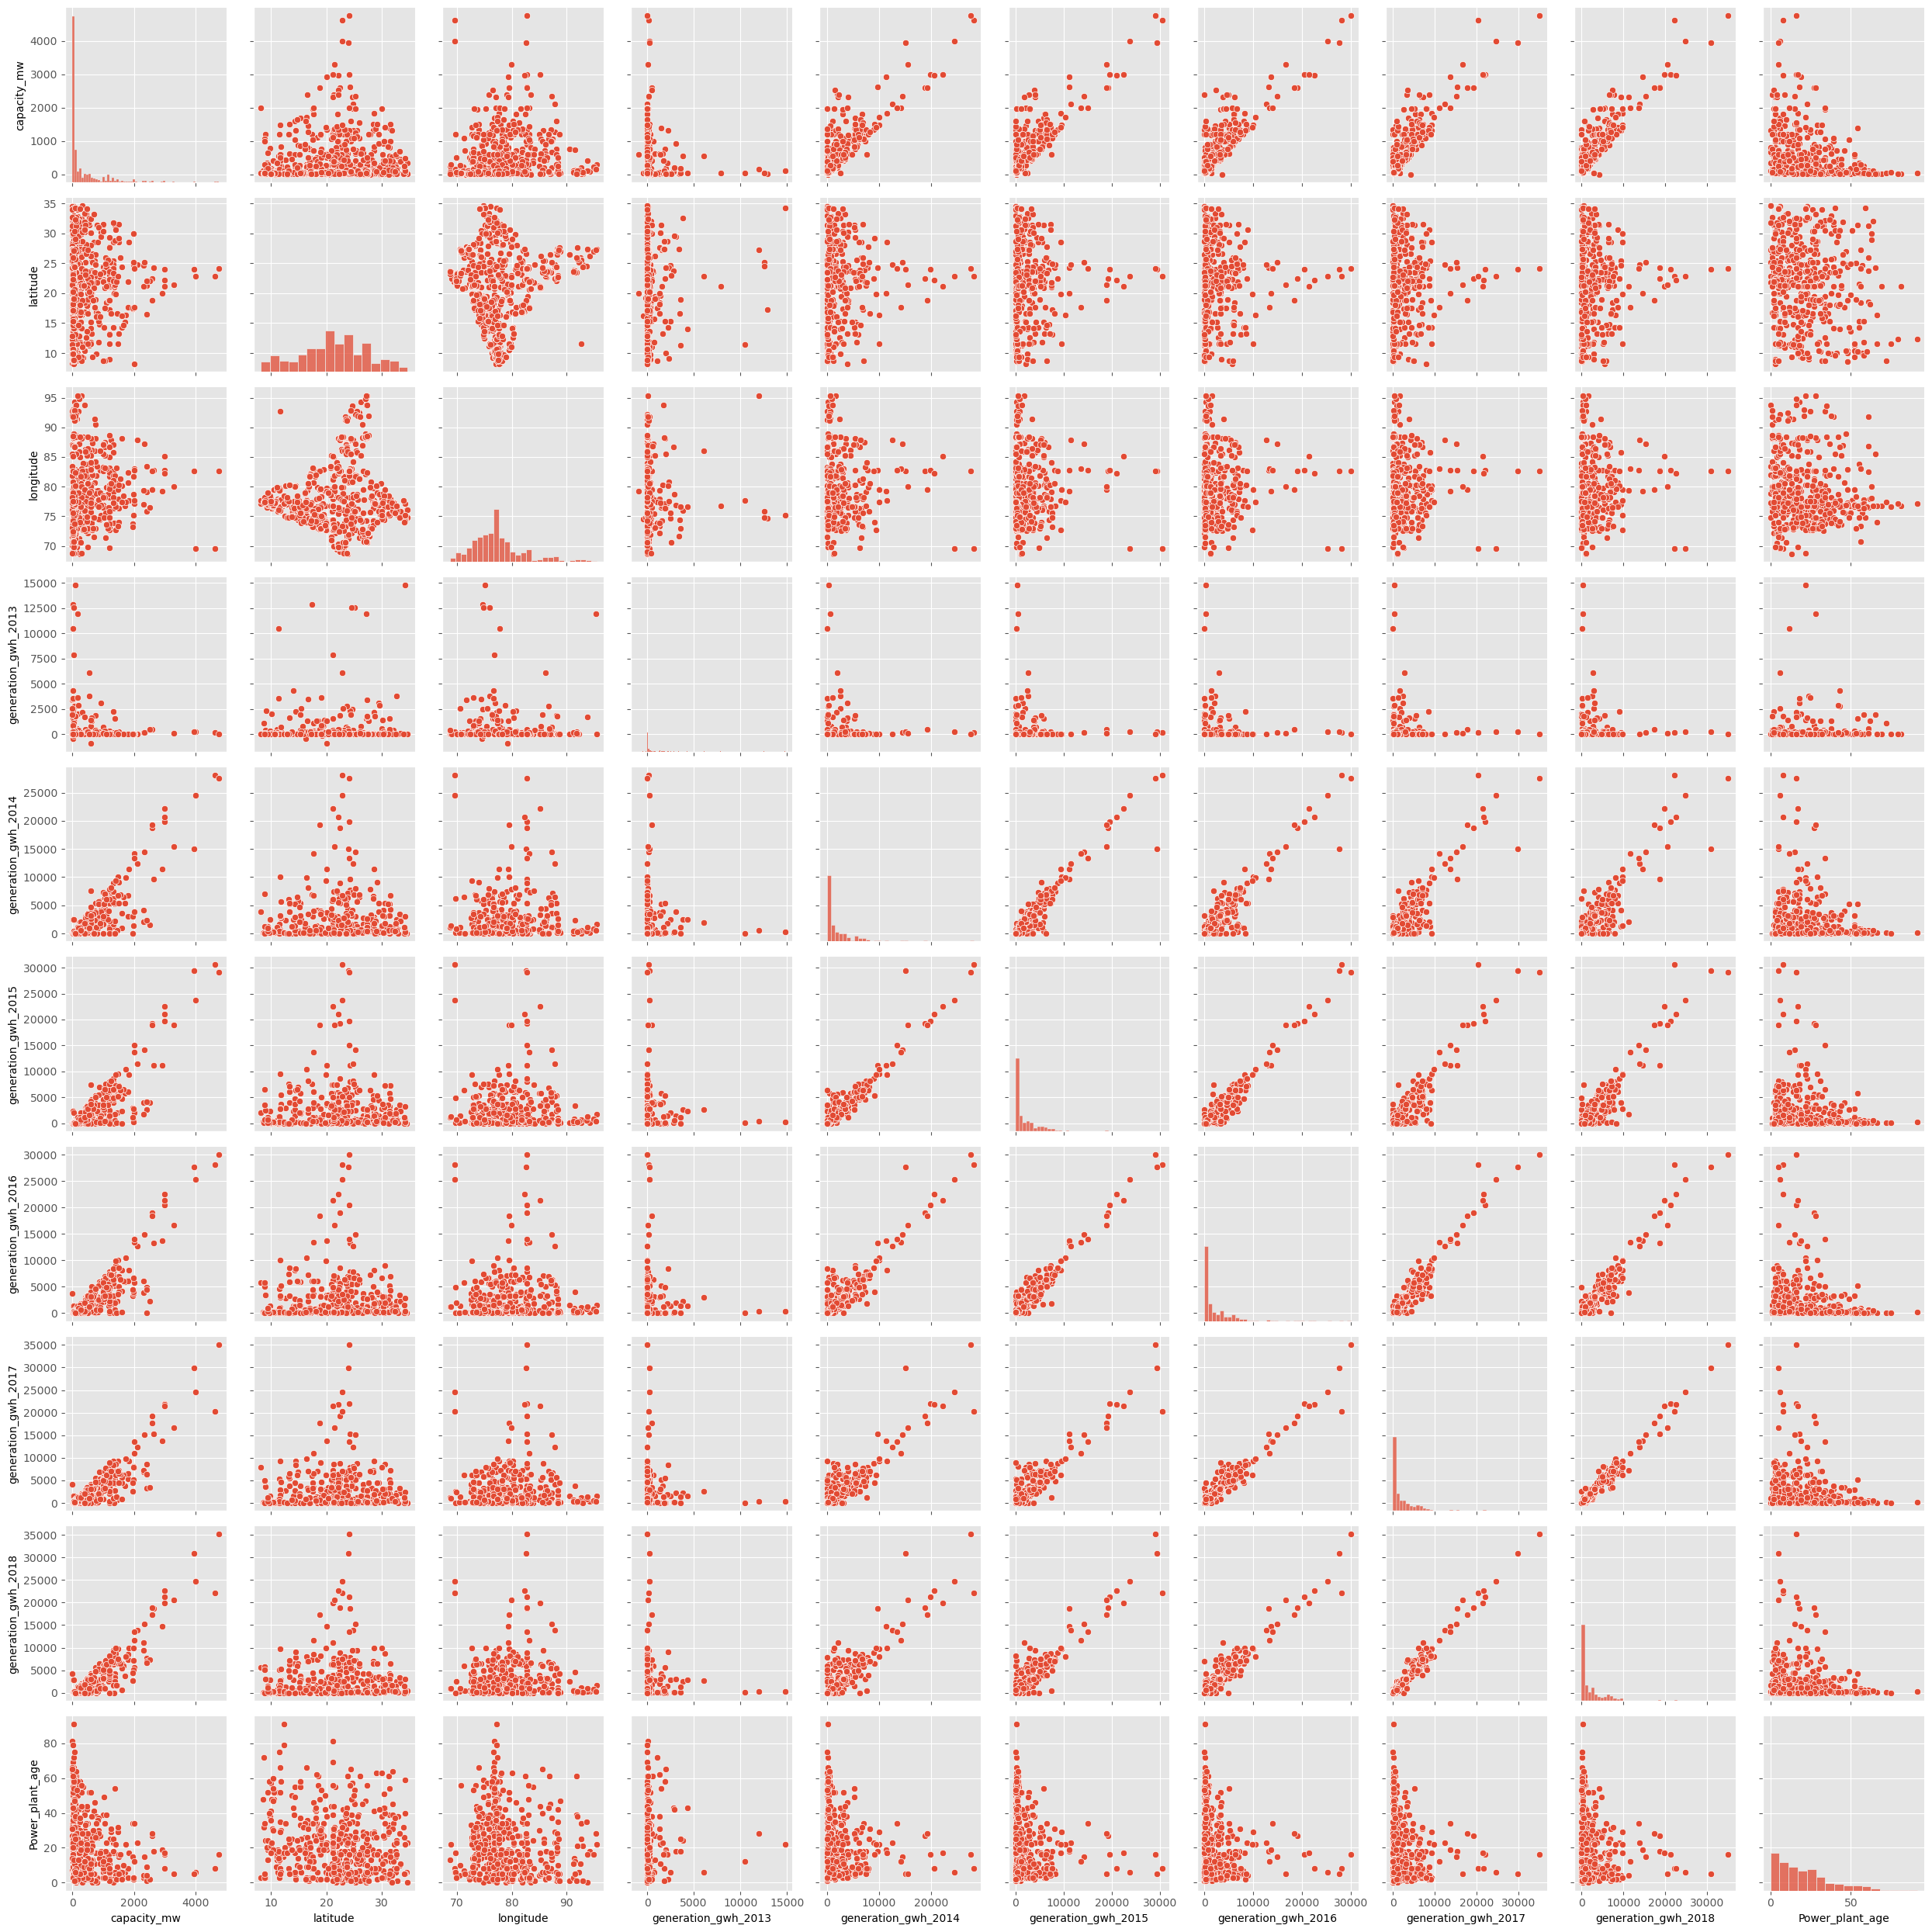

In [39]:
sns.pairplot(df)

Most of features have strong linear relation ship and correlation with each other.

From the plot we can observe the outliers in some of columns.

We can see histogram on diaogonal.

# Encoding Categorical data

In [40]:
df.drop(columns=['name'],axis=1,inplace=True)

In [41]:
df.drop(columns=['generation_data_source'],axis=1,inplace=True)

In [42]:
Category=['primary_fuel', 'other_fuel1', 'source', 'geolocation_source']

In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])
df.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,Power_plant_age
0,2.5,28.1839,73.2407,6,3,109,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0
1,98.0,24.7663,74.6090,1,3,174,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,7,3,21,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,2,3,22,2,2.41461,617.789264,843.747,886.004428,663.774500,626.239128,NaN,14.0
4,1800.0,21.9603,82.4091,1,2,22,2,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,3.0


# Outliers Detection and Removal

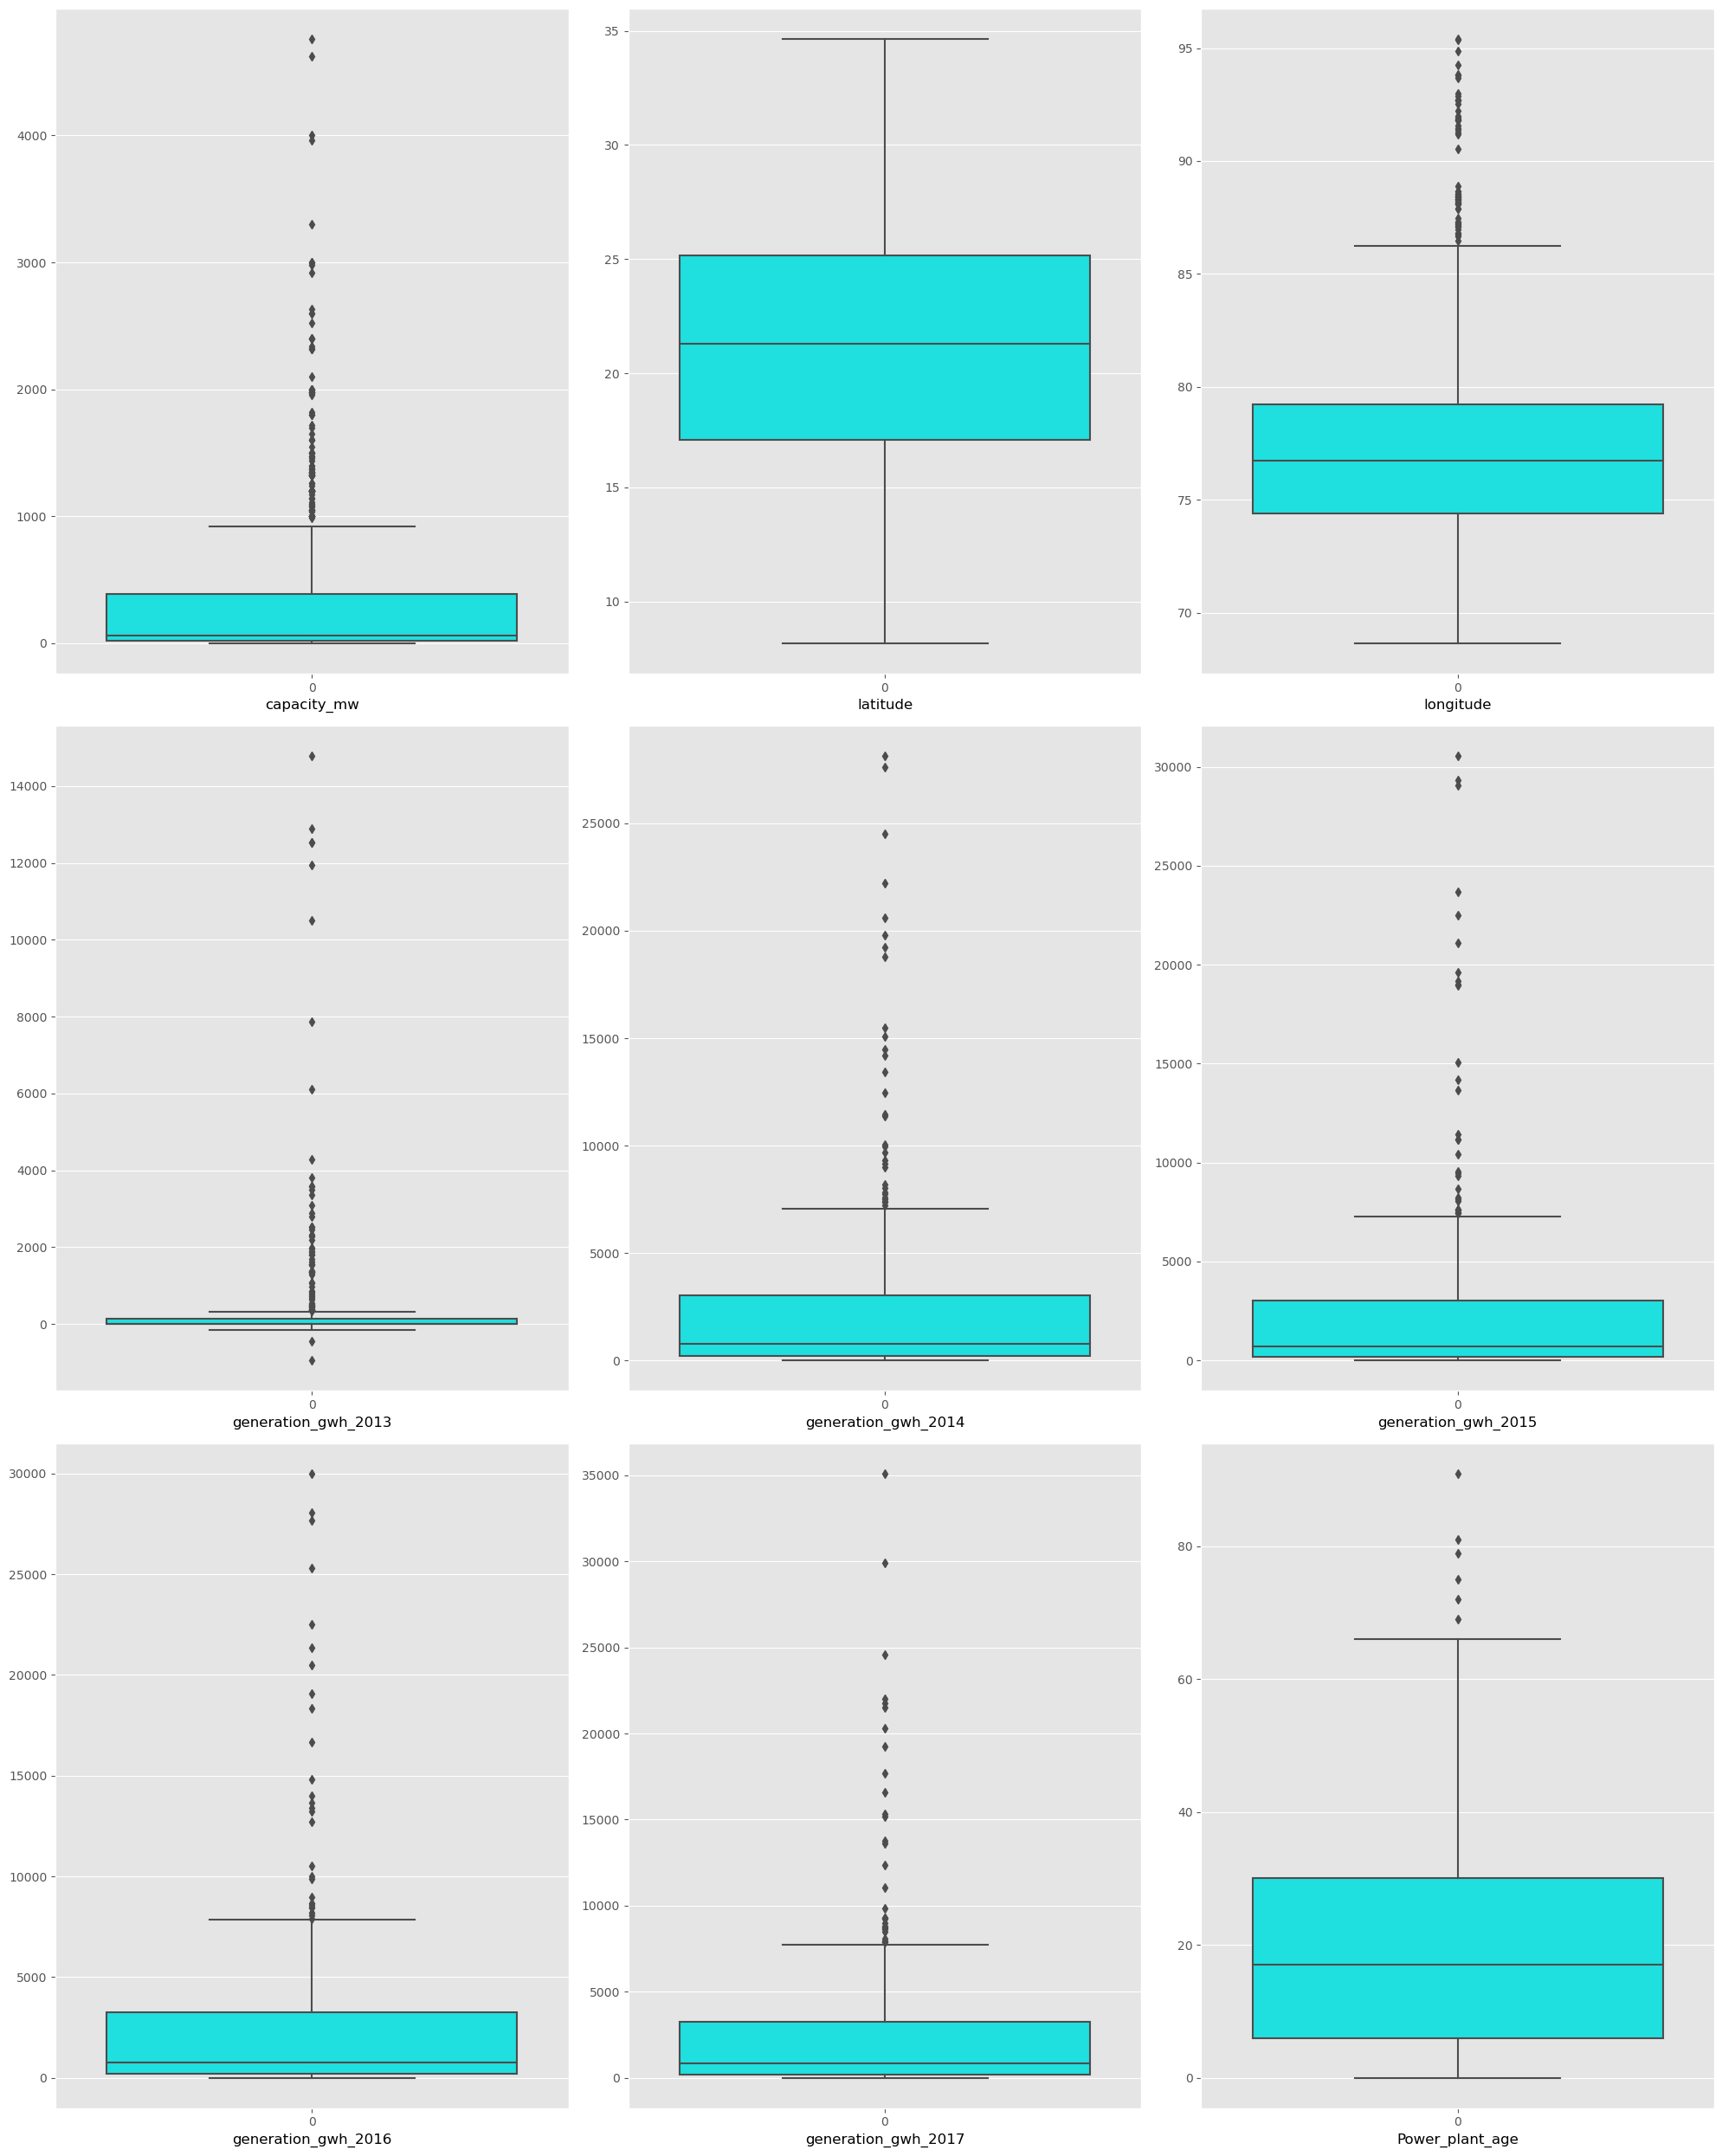

In [44]:
plt.figure(figsize=(20,25))
plotnumber=1
for col in Numerical:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[col],color='cyan')
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.tight_layout()

There are outliers exist in data.

There are no outliers in lower caping level.

So we will use Quantile based flooring and Capping technique.

In [45]:
df.drop(columns=['source','geolocation_source'],axis=1,inplace=True)

In [46]:
df2=df.copy

In [47]:
df3=df.copy()
Q1 = df3.quantile(0)
Q3= df3.quantile(0.85)
IQR = Q3 - Q1
print(IQR)

capacity_mw             720.000000
latitude                 19.198860
longitude                13.304440
primary_fuel              6.000000
other_fuel1               3.000000
generation_gwh_2013    1282.273750
generation_gwh_2014    5252.204663
generation_gwh_2015    5060.733915
generation_gwh_2016    5157.019802
generation_gwh_2017    5579.967750
generation_gwh_2018    5988.440800
Power_plant_age          39.000000
dtype: float64


In [48]:
data = df3[~((df3 < (Q1 - 1.5 * IQR)) |(df3 > (Q3 + 1.5 * IQR))).any(axis=1)]
print(data.shape)

(854, 13)


In [49]:
print("\033[1m"+'Percentage Data Loss :'+"\033[0m",((908-876)/876)*100,'%')

Percentage Data Loss : 3.65296803652968 %


# Correlation Matrix

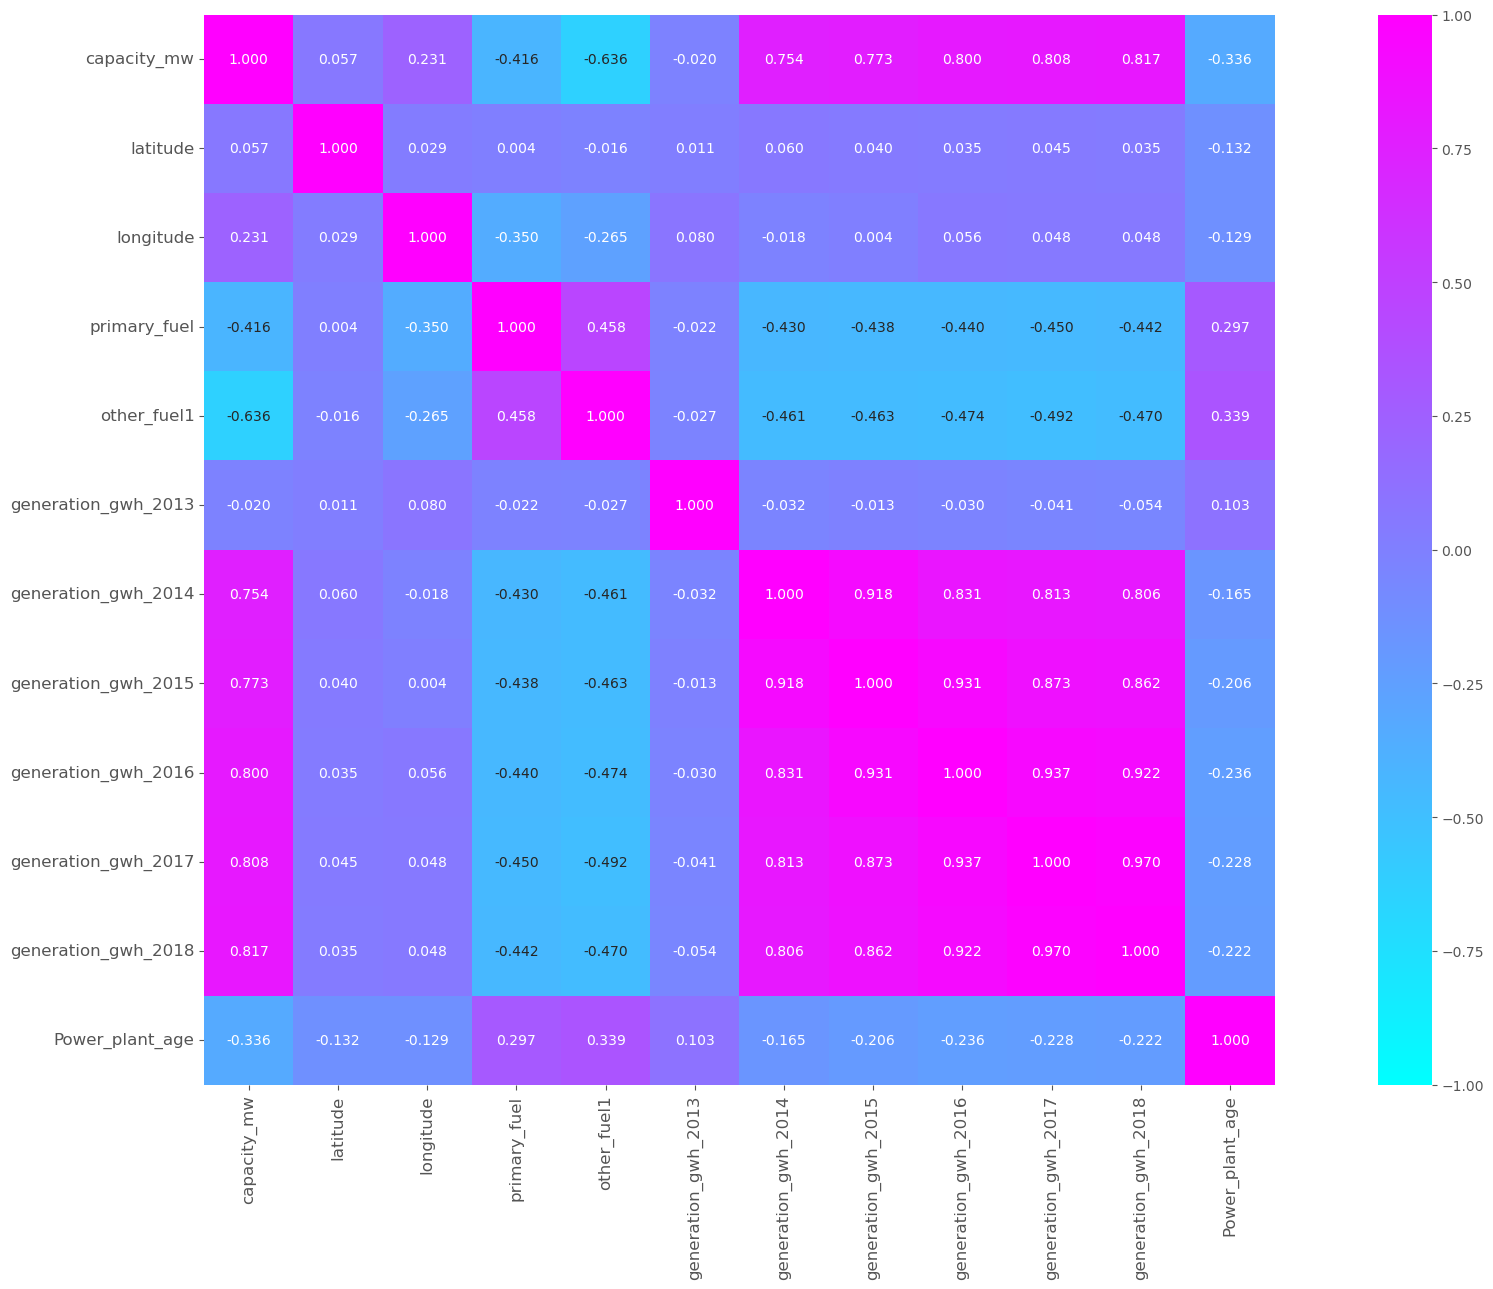

In [50]:
plt.figure(figsize=(21,13))
sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="cool")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

The label capacity_mw is highly correlated with the features generation_gwh_2017 and generation_gwh_2016,generation_gwh_2015,
generation_gwh_2014, generation_gwh_2013.

capaity is negatively correlated with the features primary_fuel, source and Powe_plant_age.

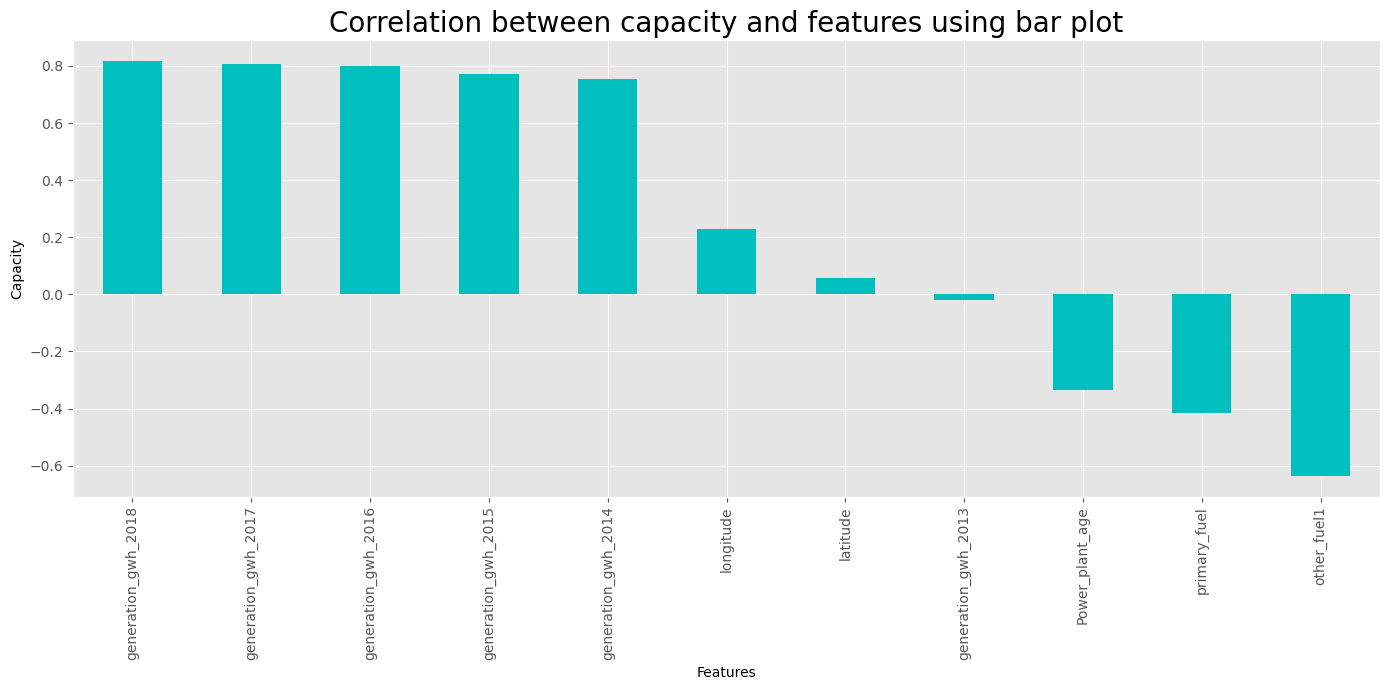

In [51]:
plt.figure(figsize=(14,7))
data.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=10)
plt.ylabel('Capacity',fontsize=10)
plt.title('Correlation between capacity and features using bar plot',fontsize=20)
plt.show()


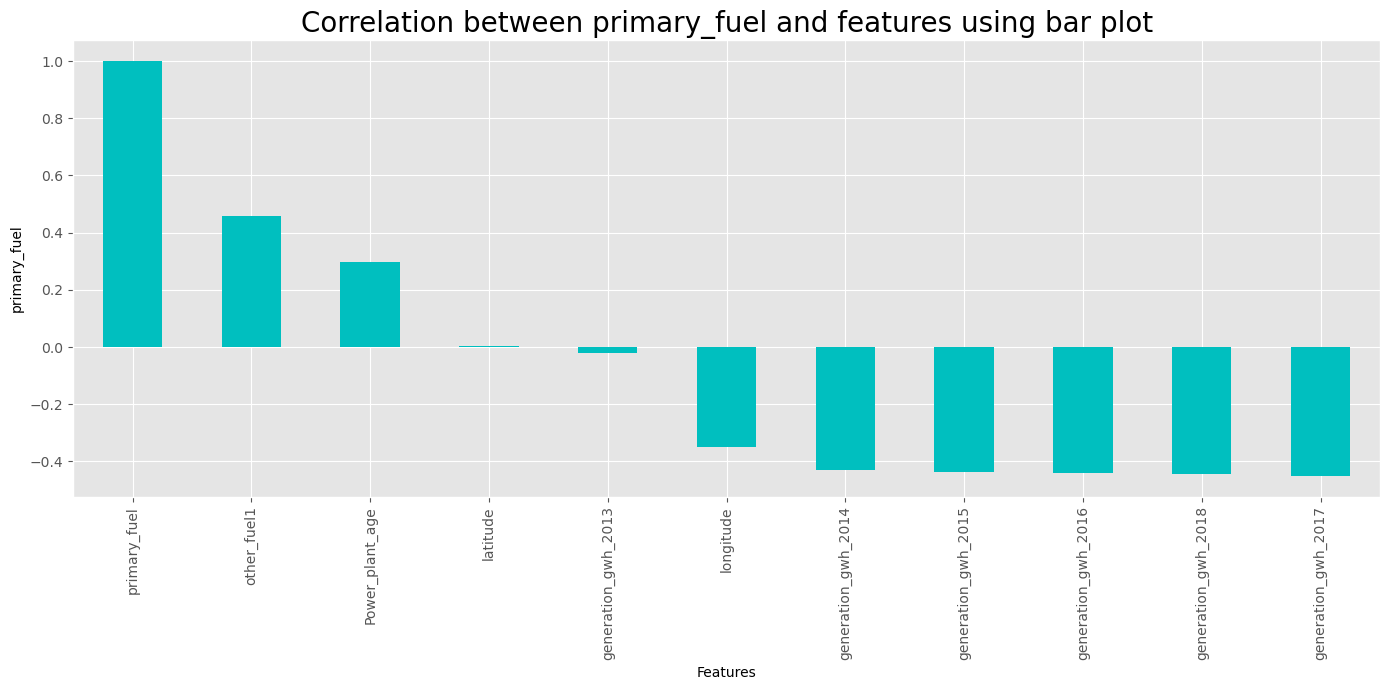

In [52]:
plt.figure(figsize=(14,7))
data.corr()['primary_fuel'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=10)
plt.ylabel('primary_fuel',fontsize=10)
plt.title('Correlation between primary_fuel and features using bar plot',fontsize=20)
plt.show()

# Skewness

In [53]:
data.skew()

capacity_mw            1.936387
latitude              -0.131956
longitude              1.199632
primary_fuel           0.419692
other_fuel1           -1.821627
generation_gwh_2013    3.351090
generation_gwh_2014    1.609535
generation_gwh_2015    1.528009
generation_gwh_2016    1.582874
generation_gwh_2017    1.473375
generation_gwh_2018    1.512171
Power_plant_age        1.035415
dtype: float64

In [54]:
skew = ['longitude','other_fuel1','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','Power_plant_age']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')

In [55]:
data[skew] = scaler.fit_transform(data[skew].values)
data[skew].head()

,longitude,other_fuel1,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Power_plant_age
0,-0.931089,0.496704,NaN,NaN,NaN,NaN,NaN,-0.793608
1,-0.515885,0.496704,NaN,NaN,NaN,NaN,NaN,NaN
2,-2.402602,0.496704,NaN,NaN,NaN,NaN,NaN,NaN
3,2.172752,0.496704,-0.318953,-0.114895,0.111218,0.136415,-0.042557,-0.169976
4,1.148004,-2.012837,NaN,0.918059,1.448872,1.496980,1.349972,-1.364213


In [56]:
data.skew()

capacity_mw            1.936387
latitude              -0.131956
longitude              0.001116
primary_fuel           0.419692
other_fuel1           -1.519243
generation_gwh_2013   -0.805481
generation_gwh_2014   -0.127635
generation_gwh_2015   -0.137056
generation_gwh_2016   -0.136479
generation_gwh_2017   -0.155626
generation_gwh_2018    1.512171
Power_plant_age       -0.073639
dtype: float64

In [57]:
df.drop("other_fuel1",axis=1,inplace=True)

In [58]:
data['Power_plant_age'] = data['Power_plant_age'].fillna(data['Power_plant_age'].mean())

Since we have done with EDA now its time to removal of missing data.

In [59]:
df.drop("generation_gwh_2013",axis=1,inplace=True)
df.drop("generation_gwh_2014",axis=1,inplace=True)
df.drop("generation_gwh_2015",axis=1,inplace=True)
df.drop("generation_gwh_2016",axis=1,inplace=True)
df.drop("generation_gwh_2017",axis=1,inplace=True)


# Machine learning Model Building and Classification

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

# Standard Scalling

In [61]:
X = df.drop(['primary_fuel'], axis =1)
Y = df['primary_fuel']

In [62]:
X=df.drop(columns =['primary_fuel'])
Y=df['primary_fuel']

In [63]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

ValueError: could not convert string to float: 'Central Electricity Authority'

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

# Finding Best Random State

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,1000):
    X_train,X_test,Y_train,Y_test = train_test_split(X_scale,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

# Logistic Regression Model

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=737, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

# Decision Tree Classifier

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=737, test_size=.3)
dtc=DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
y_pred=dtc.predict(X_test)
print('\033[1m'+'DecisionTreeClassifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of DecisionTreeClassifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of DecisionTreeClassifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of DecisionTreeClassifier'+'\033[0m \n',classification_report(Y_test, y_pred))

# Random Forest Classifier

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=737, test_size=.3)
rfc=RandomForestClassifier()
rfc.fit(X_train,Y_train)
y_pred=rfc.predict(X_test)
print('\033[1m'+'RandomForestClassifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of RandomForestClassifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of RandomForestClassifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of RandomForestClassifier'+'\033[0m \n',classification_report(Y_test, y_pred))

# Extra Trees Classifier()

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=737, test_size=.3)
etc=ExtraTreesClassifier()
etc.fit(X_train,Y_train)
y_pred=etc.predict(X_test)
print('\033[1m'+'ExtraTreesClassifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of ExtraTreesClassifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of ExtraTreesClassifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of ExtraTreesClassifier'+'\033[0m \n',classification_report(Y_test, y_pred))

# Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
       DecisionTreeClassifier(),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('============================================================================================================')


# Hyper Parameter Tunnig GreadSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameter = {  'bootstrap': [True], 'max_depth': [5, 10,20,40,50,60], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,60,70]}

In [ ]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,verbose=5)
GCV.fit(X_train,Y_train)

In [ ]:
GCV.best_params_

# Final Classification Model

In [ ]:
Final_mod = RandomForestClassifier(bootstrap=True,criterion='gini',n_estimators=60, max_depth=50 ,max_features='auto')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

In [ ]:
y_prob = Final_mod.predict_proba(X_test)

macro_roc_auc_ovo = roc_auc_score(Y_test, y_prob, multi_class="ovo", average="macro")
weighted_roc_auc_ovo = roc_auc_score(Y_test, y_prob, multi_class="ovo", average="weighted")
macro_roc_auc_ovr = roc_auc_score(Y_test, y_prob, multi_class="ovr", average="macro")
weighted_roc_auc_ovr = roc_auc_score(Y_test, y_prob, multi_class="ovr", average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("="*40)
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

In [ ]:
import scikitplot as sktplt

In [ ]:
from sklearn import metrics
class_names = df.columns
metrics.plot_confusion_matrix(Final_mod, X_test, Y_test, cmap='mako')
plt.title('\t Confusion Matrix for Extra Trees Classifier \n')
plt.show()

Saving The Model

In [ ]:
import joblib
joblib.dump(Final_mod,'powerplant_classification_Final.pkl')


# Machine Learning Model Building Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso
from xgboost import XGBRegressor

Feature Engineering Before Proceeding

In [ ]:
df2=df.copy()

In [ ]:
df3=df2.copy()
Q1 = df3.quantile(0)
Q3= df3.quantile(0.85)
IQR = Q3 - Q1
print(IQR)

In [ ]:
data = df3[~((df3 < (Q1 - 1.5 * IQR)) |(df3 > (Q3 + 1.5 * IQR))).any(axis=1)]
print(data.shape)

In [ ]:
skew = ['longitude','capacity_mw','generation_gwh_2018','Power_plant_age']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')
data[skew] = scaler.fit_transform(data[skew].values)
data[skew].head()

In [ ]:
data.drop("primary_fuel",axis=1,inplace=True)
data['Power_plant_age'] = data['Power_plant_age'].fillna(data['Power_plant_age'].mean())

# Standard Scaling

In [64]:
X = df.drop(['capacity_mw'], axis =1)
Y = df['capacity_mw']

In [65]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform('X')

ValueError: could not convert string to float: 'X'

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=557, test_size=.33)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

NameError: name 'X_scale' is not defined